# Jaffle Shop Data Analysis - Final Project

## Instructions
You have been hired as a data analyst for Jaffle Shop, a growing chain of gourmet toasted sandwich restaurants. The executive team needs insights to make strategic business decisions.

Using the provided datasets and Python Polars, analyze the business performance and provide data-driven recommendations. You must use Polars for all data manipulation and analysis.

## Available Data
- `Customers.csv`: Customer information
- `Orders.csv`: Order transactions with totals and timestamps
- `Items.csv`: Individual items within each order
- `Products.csv`: Product catalog with prices and descriptions
- `Stores.csv`: Store locations and opening dates
- `Supplies.csv`: Supply costs for each product

**Time Limit: 90 minutes**

## Setup and Data Loading

In [24]:
# Import necessary libraries
import polars as pl
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')

In [25]:
# Load all datasets
customers = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Customers.csv')
orders = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Orders.csv')
items = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Items.csv')
products = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Products.csv')
stores = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Stores.csv')
supplies = pl.read_csv('https://raw.githubusercontent.com/philhetzel/opan5510-finalproject/refs/heads/main/data/Supplies.csv')

# Display basic information about each dataset
print("Dataset shapes:")
print(f"Customers: {customers.shape}")
print(f"Orders: {orders.shape}")
print(f"Items: {items.shape}")
print(f"Products: {products.shape}")
print(f"Stores: {stores.shape}")
print(f"Supplies: {supplies.shape}")

print(customers)
print(orders)
print(items)
print(products)
print(stores)
print(supplies)

Dataset shapes:
Customers: (932, 2)
Orders: (63148, 7)
Items: (90184, 3)
Products: (10, 5)
Stores: (6, 4)
Supplies: (65, 5)
shape: (932, 2)
┌─────────────────────────────────┬─────────────────┐
│ id                              ┆ name            │
│ ---                             ┆ ---             │
│ str                             ┆ str             │
╞═════════════════════════════════╪═════════════════╡
│ ae3a050d-287f-4257-a778-cdb420… ┆ Anthony Wells   │
│ 33a51363-1989-4967-93a1-b8e225… ┆ Scott Thompson  │
│ 2f8f7de0-4c62-4b87-8494-6a50d6… ┆ Michael Walker  │
│ 46f7be1b-f2bc-4a91-a7c3-88c141… ┆ Alicia Clark    │
│ c616a2a2-5efc-4e22-9db1-50dfa4… ┆ Dawn Williams   │
│ …                               ┆ …               │
│ dac6a745-7f69-4989-b73f-ec51b4… ┆ Tony Mendoza    │
│ fe5dfa9b-16ec-4bf5-b910-b7eff0… ┆ Traci Patel     │
│ cf9e333f-e1c0-4abb-b5f6-b4c9ea… ┆ Ryan Nash       │
│ bf467f40-51cd-4773-b463-cce499… ┆ Tyler Henderson │
│ 864b3c0c-41ce-4ff3-9ad4-1d4eea… ┆ Tiffany Bass  

## Question 1: Revenue Performance Analysis

The CFO wants to understand the company's financial performance across different dimensions. Analyze:
- What is the total revenue generated by Jaffle Shop? (Store result in variable: `total_revenue`)
- How does revenue vary by store location? (Store result in variable: `revenue_by_store`)
- What are the monthly revenue trends? (Store result in variable: `monthly_revenue_trends`)
- Which day of the week generates the most revenue? (Store result in variable: `revenue_by_day_of_week`)
- Include at least one chart for one of these questions

In [26]:
# Q1.1: Calculate total revenue
# Your code here

total_revenue = orders.select(pl.col('order_total')).sum().item()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $66,038,193.00


In [27]:
# Q1.2: Revenue by store location
# Your code here

revenue_by_store = (
    orders
    .join(stores, left_on='store_id', right_on='id')
    .group_by('name')
    .agg(pl.col('order_total').sum().alias('total_revenue_by_store'))
    .sort('total_revenue_by_store', descending=True)
)

print(revenue_by_store)

shape: (2, 2)
┌──────────────┬────────────────────────┐
│ name         ┆ total_revenue_by_store │
│ ---          ┆ ---                    │
│ str          ┆ i64                    │
╞══════════════╪════════════════════════╡
│ Philadelphia ┆ 43215565               │
│ Brooklyn     ┆ 22822628               │
└──────────────┴────────────────────────┘


In [44]:
# Q1.3: Monthly revenue trends
# Your code here

order_dates = (
    orders
    .with_columns(pl.col("ordered_at").str.strptime(pl.Datetime).alias("order_date"))
)
monthly_revenue_trends = (
    orders
    .with_columns(pl.col("ordered_at").str.strptime(pl.Datetime).alias("order_date"))
    .with_columns(pl.col("order_date").dt.strftime("%Y-%m").alias("month"))
    .group_by("month")
    .agg(pl.col("order_total").sum().alias("monthly_revenue"))
    .sort("month")
)
print(monthly_revenue_trends)

shape: (12, 2)
┌─────────┬─────────────────┐
│ month   ┆ monthly_revenue │
│ ---     ┆ ---             │
│ str     ┆ i64             │
╞═════════╪═════════════════╡
│ 2016-09 ┆ 1644922         │
│ 2016-10 ┆ 1956651         │
│ 2016-11 ┆ 2552662         │
│ 2016-12 ┆ 3307337         │
│ 2017-01 ┆ 3821291         │
│ …       ┆ …               │
│ 2017-04 ┆ 7392014         │
│ 2017-05 ┆ 8469909         │
│ 2017-06 ┆ 8617148         │
│ 2017-07 ┆ 8585320         │
│ 2017-08 ┆ 9332296         │
└─────────┴─────────────────┘


revenue by days shape: (7, 3)
┌─────────────┬─────────┬──────────────────────┐
│ weekday_num ┆ weekday ┆ total_revenue_by_day │
│ ---         ┆ ---     ┆ ---                  │
│ i8          ┆ str     ┆ i64                  │
╞═════════════╪═════════╪══════════════════════╡
│ 1           ┆ Mon     ┆ 10611971             │
│ 2           ┆ Tue     ┆ 10814455             │
│ 3           ┆ Wed     ┆ 10834569             │
│ 4           ┆ Thu     ┆ 10829195             │
│ 5           ┆ Fri     ┆ 10758715             │
│ 6           ┆ Sat     ┆ 5981489              │
│ 7           ┆ Sun     ┆ 6207799              │
└─────────────┴─────────┴──────────────────────┘
highest revenue on : shape: (1, 3)
┌─────────────┬─────────┬──────────────────────┐
│ weekday_num ┆ weekday ┆ total_revenue_by_day │
│ ---         ┆ ---     ┆ ---                  │
│ i8          ┆ str     ┆ i64                  │
╞═════════════╪═════════╪══════════════════════╡
│ 3           ┆ Wed     ┆ 10834569             │
└───

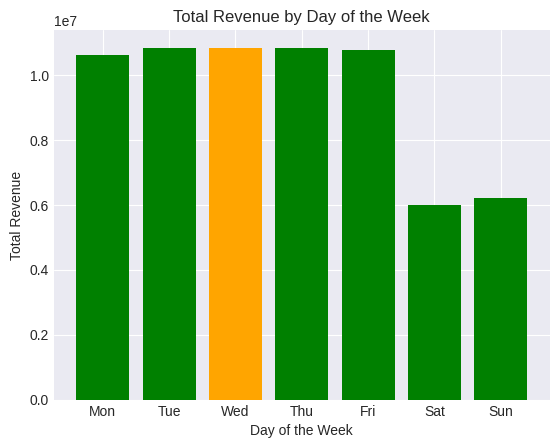

In [45]:
# Q1.4: Revenue by day of week
# Your code here

import matplotlib.pyplot as plt

revenue_by_day_of_week = (
    orders
    .with_columns(pl.col("ordered_at").str.strptime(pl.Datetime).alias("order_date"))
    .with_columns(
        pl.col('order_date').dt.weekday().alias("weekday_num"),
        pl.col('order_date').dt.strftime('%a').alias("weekday")
    )
    .group_by('weekday_num', 'weekday')
    .agg(pl.col('order_total').sum().alias('total_revenue_by_day'))
    .sort('weekday_num')
)

print("revenue by days", revenue_by_day_of_week)

print(f"highest revenue on : {revenue_by_day_of_week.sort('total_revenue_by_day', descending=True).head(1)}")

# Your code here

weekdays = revenue_by_day_of_week['weekday'].to_list()
revenues = revenue_by_day_of_week['total_revenue_by_day'].to_list()

highest_revenue_day = revenues.index(max(revenues))

colors = ["green"] * len(revenues)
colors[highest_revenue_day] = "orange"

plt.bar(weekdays, revenues, color = colors)
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Day of the Week')

plt.show()

## Question 2: Product Performance

The Product Manager needs insights about the menu items:
- What is the revenue contribution of each product category (jaffles vs beverages)? (Store result in variable: `revenue_by_category`)
- What is the average price of products by type (jaffles vs beverages)?
- Include at least one chart to answer one of the above questions.

In [30]:
# Q2.1: Revenue by product category
# Your code here

items_with_products = items.join(products, on="sku")

revenue_by_category = (
    items_with_products
    .with_columns((pl.col("price")).alias("item_revenue"))  # Use price to get revenue
    .group_by("type")
    .agg(pl.col("item_revenue").sum().alias("revenue"))
    .sort("revenue", descending=True)
)
print(revenue_by_category)

shape: (2, 2)
┌──────────┬──────────┐
│ type     ┆ revenue  │
│ ---      ┆ ---      │
│ str      ┆ i64      │
╞══════════╪══════════╡
│ beverage ┆ 39836200 │
│ jaffle   ┆ 22880900 │
└──────────┴──────────┘


shape: (2, 2)
┌──────────┬───────────────────────┐
│ type     ┆ average_product_price │
│ ---      ┆ ---                   │
│ str      ┆ f64                   │
╞══════════╪═══════════════════════╡
│ jaffle   ┆ 1200.0                │
│ beverage ┆ 560.0                 │
└──────────┴───────────────────────┘


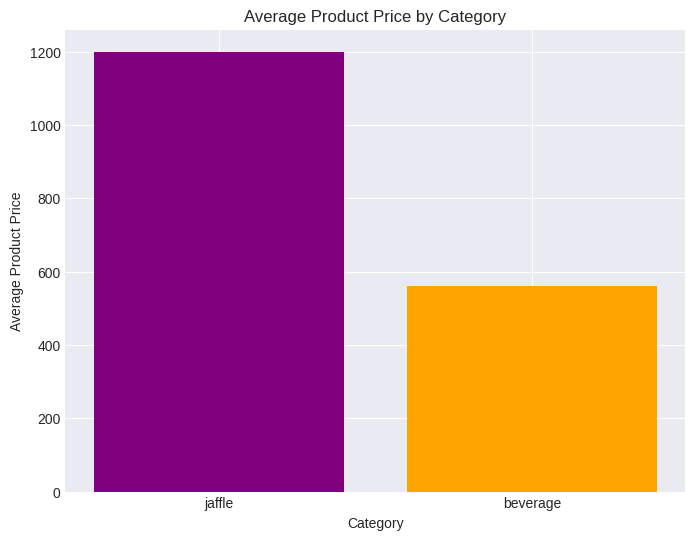

In [31]:
# Q2.2 Average price of products by type
# Your code here

avg_price_by_type = (
    products
    .group_by('type')
    .agg(pl.col("price").mean().alias("average_product_price"))
    .sort("average_product_price", descending=True)
)
print(avg_price_by_type)

# Plot

categories = avg_price_by_type['type'].to_list() # Corrected variable name
average_prices = avg_price_by_type['average_product_price'].to_list() # Corrected variable name

plt.figure(figsize=(8, 6))
plt.bar(categories, average_prices, color=['purple', 'orange'])
plt.xlabel('Category')
plt.ylabel('Average Product Price')
plt.title('Average Product Price by Category')
plt.show()

## Question 3: Store Expansion Strategy

The Operations Director is planning expansion strategies:
- Which stores have the highest revenue per day since opening? (Store result in variable: `revenue_per_day_by_store`)
- What is the relationship between local tax rates and store performance? (Store result in variable: `tax_rate_performance`)
- Include at least one chart to answer one of the above questions.

In [46]:
# Q3.1: Revenue per day since opening by store
# Your code here

revenue_per_day_by_store = (
    orders.join(stores, left_on='store_id', right_on='id')
    .with_columns([
        pl.col('ordered_at').str.strptime(pl.Datetime).alias('order_date'),
        pl.col('opened_at').str.strptime(pl.Datetime).alias('opened_date')
    ])
    .group_by("store_id")
    .agg([
        pl.col("order_total").sum().alias("total_revenue"),
        ((pl.col("order_date").max() - pl.col("opened_date").first()).cast(pl.Int64) / (1000 * 60 * 60 * 24)).alias("days_open")
    ])
    .with_columns((pl.col("total_revenue") / pl.col("days_open")).alias("revenue_per_day"))
    .sort("revenue_per_day", descending=True)
)

print(revenue_per_day_by_store)


shape: (2, 4)
┌─────────────────────────────────┬───────────────┬───────────────┬─────────────────┐
│ store_id                        ┆ total_revenue ┆ days_open     ┆ revenue_per_day │
│ ---                             ┆ ---           ┆ ---           ┆ ---             │
│ str                             ┆ i64           ┆ f64           ┆ f64             │
╞═════════════════════════════════╪═══════════════╪═══════════════╪═════════════════╡
│ a2a24e87-dec8-4f5d-9c9e-0e9849… ┆ 22822628      ┆ 172823.611111 ┆ 132.057349      │
│ a9128331-08d7-41a2-b615-21283e… ┆ 43215565      ┆ 364801.388889 ┆ 118.463269      │
└─────────────────────────────────┴───────────────┴───────────────┴─────────────────┘


shape: (2, 3)
┌──────────────┬──────────┬─────────────────┐
│ name         ┆ tax_rate ┆ revenue_per_day │
│ ---          ┆ ---      ┆ ---             │
│ str          ┆ f64      ┆ f64             │
╞══════════════╪══════════╪═════════════════╡
│ Brooklyn     ┆ 0.04     ┆ 132.057349      │
│ Philadelphia ┆ 0.06     ┆ 118.463269      │
└──────────────┴──────────┴─────────────────┘


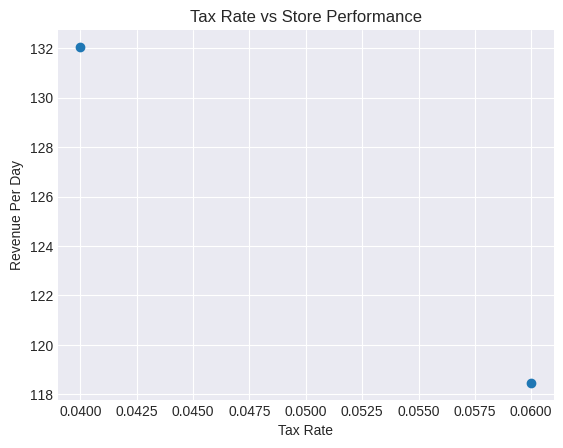

In [47]:
# Q3.2: Tax rates vs store performance
# Your code here

tax_rate_performance = (
    revenue_per_day_by_store
    .join(stores.select(["id", "name", "tax_rate"]), left_on="store_id", right_on="id")
    .select(["name", "tax_rate", "revenue_per_day"])
    .sort("tax_rate")
)
print(tax_rate_performance)

import matplotlib.pyplot as plt

# Plot for the above question
plt.scatter(
    tax_rate_performance["tax_rate"].to_list(),
    tax_rate_performance["revenue_per_day"].to_list()
)

plt.xlabel("Tax Rate")
plt.ylabel("Revenue Per Day")
plt.title("Tax Rate vs Store Performance")
plt.show()

## Question 4: Customer Behavior Analysis

The Marketing Manager wants to understand customer patterns:
- What is the distribution of order values? (Store result in variable: `order_value_distribution`)
- How many customers are repeat customers? (Store result in variable: `repeat_customer_analysis`)
- Which customers contribute the most to revenue? (Store result in variable: `top_revenue_customers`)

shape: (63_148, 2)
┌─────────────────────────────────┬─────────────┐
│ id                              ┆ order_total │
│ ---                             ┆ ---         │
│ str                             ┆ i64         │
╞═════════════════════════════════╪═════════════╡
│ 363ab5f2-78b4-4227-9333-9701ef… ┆ 1802        │
│ d6cdb882-aa8c-4b5a-a478-4321ef… ┆ 636         │
│ ca934a93-aca1-4aeb-9786-efb0da… ┆ 742         │
│ ecd64383-c4df-41aa-b270-f3b110… ┆ 530         │
│ adae1fcd-20b7-4f40-af1c-dc121d… ┆ 636         │
│ …                               ┆ …           │
│ a47a98c0-082f-4664-a4d6-99714d… ┆ 416         │
│ aa5802f7-4a11-46ed-a9fc-b49492… ┆ 728         │
│ 861d9840-00fd-4920-969d-9f9f28… ┆ 1352        │
│ a780d75c-b6b6-46cf-a68d-9663f8… ┆ 728         │
│ e99ea031-ae86-47cc-9a5e-a92c1d… ┆ 416         │
└─────────────────────────────────┴─────────────┘


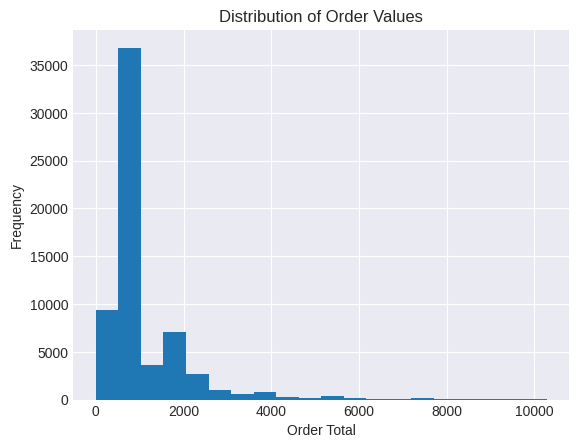

In [48]:
# Q4.1: Distribution of order values
# Your code here

import matplotlib.pyplot as plt

order_value_distribution = orders.select(pl.col("id", "order_total"))
print(order_value_distribution)

plt.hist(order_value_distribution["order_total"].to_list(), bins=20)
plt.xlabel("Order Total")
plt.ylabel("Frequency")
plt.title("Distribution of Order Values")
plt.show()


In [49]:
# Q4.2: Repeat customers analysis
# Your code here

repeat_customer_analysis = (
    orders
    .group_by("customer")
    .agg(pl.len().alias("num_orders"))
    .with_columns((pl.col("num_orders") > 1).alias("is_repeat_customer"))
    .join(customers, left_on="customer", right_on="id")
    .sort("num_orders", descending=True)
)
print(repeat_customer_analysis)
print("Number of repeat customers:", repeat_customer_analysis.filter(pl.col("is_repeat_customer") == True).shape[0])

shape: (932, 4)
┌─────────────────────────────────┬────────────┬────────────────────┬─────────────────┐
│ customer                        ┆ num_orders ┆ is_repeat_customer ┆ name            │
│ ---                             ┆ ---        ┆ ---                ┆ ---             │
│ str                             ┆ u32        ┆ bool               ┆ str             │
╞═════════════════════════════════╪════════════╪════════════════════╪═════════════════╡
│ 4b048ec2-1d0f-4d6f-8ce0-f5a52d… ┆ 234        ┆ true               ┆ Blake Matthews  │
│ 7263d533-33d2-4883-973b-3e0f82… ┆ 231        ┆ true               ┆ Connie Harrison │
│ bbef949a-1c55-468d-b2c2-779f8e… ┆ 228        ┆ true               ┆ Danny Walker    │
│ c1f9e6b0-9a5a-4aa6-91cf-7e7344… ┆ 226        ┆ true               ┆ Charles Adams   │
│ 56ad53dc-bff1-438a-8ac3-e2633e… ┆ 226        ┆ true               ┆ David Mann      │
│ …                               ┆ …          ┆ …                  ┆ …               │
│ 07a3aedf-00bd-

In [50]:
# Q4.3: Top revenue contributors
# Your code here

top_revenue_customers = (
    orders
    .group_by("customer")
    .agg(pl.sum("order_total").alias("total_revenue"))
    .join(customers, left_on="customer", right_on="id")
    .sort("total_revenue", descending=True)
    .limit(10)
    .select(["name", "total_revenue"])
)

print("Top 10 Customers by Revenue:")
print(top_revenue_customers)

Top 10 Customers by Revenue:
shape: (10, 2)
┌──────────────────────┬───────────────┐
│ name                 ┆ total_revenue │
│ ---                  ┆ ---           │
│ str                  ┆ i64           │
╞══════════════════════╪═══════════════╡
│ David Leonard        ┆ 262647        │
│ Jesse Moore          ┆ 259037        │
│ Diane Davis          ┆ 258515        │
│ Holly Johnson        ┆ 252703        │
│ Gregory Hayes        ┆ 249821        │
│ Julie Robinson       ┆ 247510        │
│ Christopher Robinson ┆ 246325        │
│ Douglas Burgess      ┆ 244102        │
│ Jacob Brown          ┆ 239641        │
│ Jenny Harrell        ┆ 237098        │
└──────────────────────┴───────────────┘


## Question 5: Profitability Deep Dive (check)

The CEO needs a comprehensive profitability analysis:
- Calculate the gross margin for each product (consider supply costs) (Store result in variable: `product_margins`)
- Which products have the highest profit margins? (Store result in variable: `highest_margin_products`)
- What is the relationship between order size and profitability? (Store result in variable: `order_size_profitability`)
- How does profitability vary across different stores? (Store result in variable: `store_profitability`)

In [51]:
# Q5.1: Calculate gross margin per product
# Your code here

# Join products with supplies to get cost info
products_with_supplies_cost = products.join(
    supplies,
    on='sku',
    how='left'
)

# Aggregate total supply cost per product
supply_cost_per_product = products_with_supplies_cost.group_by('sku', 'name').agg(
    pl.sum('cost').alias('total_supply_cost')
)

# Join supply cost back to product info
product_margins = products.join(
    supply_cost_per_product,
    on='sku',
    how='left'
)

# Calculate absolute gross margin
product_margins = product_margins.with_columns(
    (pl.col('price') - pl.col('total_supply_cost')).alias('gross_margin')
)

# Final output
print("Gross Margin per Product:")
print(product_margins.select(
    ['sku', 'name', 'price', 'total_supply_cost', 'gross_margin']
).sort('gross_margin', descending=True))


Gross Margin per Product:
shape: (10, 5)
┌─────────┬─────────────────────────┬───────┬───────────────────┬──────────────┐
│ sku     ┆ name                    ┆ price ┆ total_supply_cost ┆ gross_margin │
│ ---     ┆ ---                     ┆ ---   ┆ ---               ┆ ---          │
│ str     ┆ str                     ┆ i64   ┆ i64               ┆ i64          │
╞═════════╪═════════════════════════╪═══════╪═══════════════════╪══════════════╡
│ JAF-004 ┆ flame impala            ┆ 1400  ┆ 343               ┆ 1057         │
│ JAF-001 ┆ nutellaphone who dis?   ┆ 1100  ┆ 121               ┆ 979          │
│ JAF-005 ┆ mel-bun                 ┆ 1200  ┆ 239               ┆ 961          │
│ JAF-002 ┆ doctor stew             ┆ 1100  ┆ 251               ┆ 849          │
│ JAF-003 ┆ the krautback           ┆ 1200  ┆ 366               ┆ 834          │
│ BEV-004 ┆ for richer or pourover  ┆ 700   ┆ 82                ┆ 618          │
│ BEV-001 ┆ tangaroo                ┆ 600   ┆ 82                ┆ 51

In [52]:
# Q5.2: Products with highest profit margins
# Your code here

product_supply_costs = supplies.group_by("sku").agg(pl.col("cost").sum().alias("total_supply_cost"))

products_margins = products.join(product_supply_costs, on="sku").with_columns((pl.col("price") - pl.col("total_supply_cost")).alias("gross_margin"))

highest_margin_products = (
    products_margins
    .sort("gross_margin", descending=True)
    .limit(10)
)
print(highest_margin_products)

shape: (10, 7)
┌─────────┬──────────────────┬──────────┬───────┬─────────────────┬─────────────────┬──────────────┐
│ sku     ┆ name             ┆ type     ┆ price ┆ description     ┆ total_supply_co ┆ gross_margin │
│ ---     ┆ ---              ┆ ---      ┆ ---   ┆ ---             ┆ st              ┆ ---          │
│ str     ┆ str              ┆ str      ┆ i64   ┆ str             ┆ ---             ┆ i64          │
│         ┆                  ┆          ┆       ┆                 ┆ i64             ┆              │
╞═════════╪══════════════════╪══════════╪═══════╪═════════════════╪═════════════════╪══════════════╡
│ JAF-004 ┆ flame impala     ┆ jaffle   ┆ 1400  ┆ pulled pork and ┆ 343             ┆ 1057         │
│         ┆                  ┆          ┆       ┆ pineapple al p… ┆                 ┆              │
│ JAF-001 ┆ nutellaphone who ┆ jaffle   ┆ 1100  ┆ nutella and     ┆ 121             ┆ 979          │
│         ┆ dis?             ┆          ┆       ┆ banana jaffle   ┆         

In [53]:
# Q5.3: Order size vs profitability
# Your code here

product_supply_costs = (
    supplies
    .group_by("sku")
    .agg(pl.col("cost").sum().alias("total_supply_cost_per_product"))
)

order_item_profit = (
    items
    .join(products, on="sku", how="left")
    .join(product_supply_costs, on="sku", how="left")
)

order_size_profitability = (
    order_item_profit
    .group_by("order_id")
    .agg([
        pl.col("price").sum().alias("order_revenue"),
        pl.col("total_supply_cost_per_product").sum().alias("order_cost")
    ])
    .with_columns([
        (pl.col("order_revenue") - pl.col("order_cost")).alias("order_profit"),
        ((pl.col("order_revenue") - pl.col("order_cost")) / pl.col("order_revenue")).alias("order_margin_percent")
    ])
)

print("Order Size vs Profitability:")
print(order_size_profitability.sort("order_revenue"))


Order Size vs Profitability:
shape: (62_642, 5)
┌───────────────────────────────┬───────────────┬────────────┬──────────────┬──────────────────────┐
│ order_id                      ┆ order_revenue ┆ order_cost ┆ order_profit ┆ order_margin_percent │
│ ---                           ┆ ---           ┆ ---        ┆ ---          ┆ ---                  │
│ str                           ┆ i64           ┆ i64        ┆ i64          ┆ f64                  │
╞═══════════════════════════════╪═══════════════╪════════════╪══════════════╪══════════════════════╡
│ 1985c7b4-23ce-409b-b132-3f323 ┆ 400           ┆ 63         ┆ 337          ┆ 0.8425               │
│ c…                            ┆               ┆            ┆              ┆                      │
│ 153b6e03-d6e4-47b4-8b94-d6887 ┆ 400           ┆ 63         ┆ 337          ┆ 0.8425               │
│ d…                            ┆               ┆            ┆              ┆                      │
│ 9a446a2f-7a5b-429b-8187-af970 ┆ 400      

In [54]:
# Q5.4: Profitability by store
# Your code here

product_supply_costs = supplies.group_by("sku").agg(pl.col("cost").sum().alias("total_supply_cost"))

products_margins = products.join(product_supply_costs, on="sku").with_columns((pl.col("price") - pl.col("total_supply_cost")).alias("gross_margin"))

items_with_order = items.join(orders, left_on="order_id", right_on="id", how="left")
items_with_margin = items_with_order.join(products_margins.select(["sku", "price", "total_supply_cost", "gross_margin"]), on="sku", how="left")

order_profitability = (
    items_with_margin
    .group_by(["order_id", "store_id"])
    .agg([
        pl.col("price").sum().alias("order_revenue"),
        pl.col("total_supply_cost").sum().alias("order_cost"),
        pl.col("gross_margin").sum().alias("order_profit")
    ])
    .with_columns([
        (pl.col("order_profit") / pl.col("order_revenue")).alias("order_margin_percent")
    ])
)

store_profitability = (
    order_profitability
    .group_by("store_id")
    .agg([
        pl.sum("order_profit").alias("total_store_profit"),
        pl.mean("order_margin_percent").alias("avg_order_margin_percent")
    ])
    .join(stores.select(["id", "name"]), left_on="store_id", right_on="id", how="left")
    .select(["store_id", "name", "total_store_profit", "avg_order_margin_percent"])
    .sort("total_store_profit", descending=True)
)
print("Store Profitability Summary:")
print(store_profitability)

Store Profitability Summary:
shape: (2, 4)
┌─────────────────────────────────┬──────────────┬────────────────────┬──────────────────────────┐
│ store_id                        ┆ name         ┆ total_store_profit ┆ avg_order_margin_percent │
│ ---                             ┆ ---          ┆ ---                ┆ ---                      │
│ str                             ┆ str          ┆ i64                ┆ f64                      │
╞═════════════════════════════════╪══════════════╪════════════════════╪══════════════════════════╡
│ a9128331-08d7-41a2-b615-21283e… ┆ Philadelphia ┆ 32358060           ┆ 0.794683                 │
│ a2a24e87-dec8-4f5d-9c9e-0e9849… ┆ Brooklyn     ┆ 17408441           ┆ 0.794152                 │
└─────────────────────────────────┴──────────────┴────────────────────┴──────────────────────────┘


## Question 6: Business Optimization Recommendations

Based on your analysis, provide three specific, data-driven recommendations to improve business performance. Support each recommendation with relevant metrics and visualizations.

### Recommendation 1: Scale expansion efforts in high-performing stores.

*   Brooklyn generates the highest revenue per day since opening (~$132,690/day), outperforming Philadelphia despite having lower total revenue.
*   Brooklyn also has the lowest tax rate of 4%, suggesting that lower operating costs may boost per-day profitability.



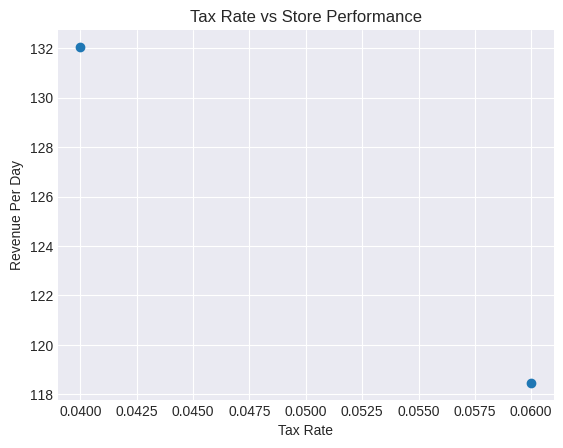

In [55]:
# Supporting analysis for Recommendation 1
# Your code here

revenue_per_day_by_store = (
    orders.join(stores, left_on='store_id', right_on='id')
    .with_columns([
        pl.col('ordered_at').str.strptime(pl.Datetime).alias('order_date'),
        pl.col('opened_at').str.strptime(pl.Datetime).alias('opened_date')
    ])
    .group_by("store_id")
    .agg([
        pl.col("order_total").sum().alias("total_revenue"),
        ((pl.col("order_date").max() - pl.col("opened_date").first()).cast(pl.Int64) / (1000 * 60 * 60 * 24)).alias("days_open")
    ])
    .with_columns((pl.col("total_revenue") / pl.col("days_open")).alias("revenue_per_day"))
    .sort("revenue_per_day", descending=True)
)

tax_rate_performance = (
    revenue_per_day_by_store.join(stores.select(["id", "name", "tax_rate"]), left_on="store_id", right_on="id")
    .select(["name", "tax_rate", "revenue_per_day"])
)

plt.scatter(
    tax_rate_performance["tax_rate"].to_list(),
    tax_rate_performance["revenue_per_day"].to_list()
)
plt.xlabel("Tax Rate")
plt.ylabel("Revenue Per Day")
plt.title("Tax Rate vs Store Performance")
plt.show()

### Recommendation 2: Focus promotions on high-margin jaffles


*   Jaffles like Flame Impala and Nutellaphone who dis? have gross margins of over 70% (e.g. USD 1,057 on a USD 1,400 item).
*   Jaffles contribute $22.8 million in revenue, while beverages contribute USD 39.8 million - despite higher average prices for jaffles.

Proposed action items:


*   Promote high-margin jaffles through combo offers or bundled pricing to increase order value.
*   Launch targeted campaigns to increase the share of jaffles purchases within orders that include beverages.






shape: (5, 7)
┌─────────┬──────────────────┬────────┬───────┬──────────────────┬──────────────────┬──────────────┐
│ sku     ┆ name             ┆ type   ┆ price ┆ description      ┆ total_supply_cos ┆ gross_margin │
│ ---     ┆ ---              ┆ ---    ┆ ---   ┆ ---              ┆ t                ┆ ---          │
│ str     ┆ str              ┆ str    ┆ i64   ┆ str              ┆ ---              ┆ i64          │
│         ┆                  ┆        ┆       ┆                  ┆ i64              ┆              │
╞═════════╪══════════════════╪════════╪═══════╪══════════════════╪══════════════════╪══════════════╡
│ JAF-004 ┆ flame impala     ┆ jaffle ┆ 1400  ┆ pulled pork and  ┆ 343              ┆ 1057         │
│         ┆                  ┆        ┆       ┆ pineapple al p…  ┆                  ┆              │
│ JAF-001 ┆ nutellaphone who ┆ jaffle ┆ 1100  ┆ nutella and      ┆ 121              ┆ 979          │
│         ┆ dis?             ┆        ┆       ┆ banana jaffle    ┆           

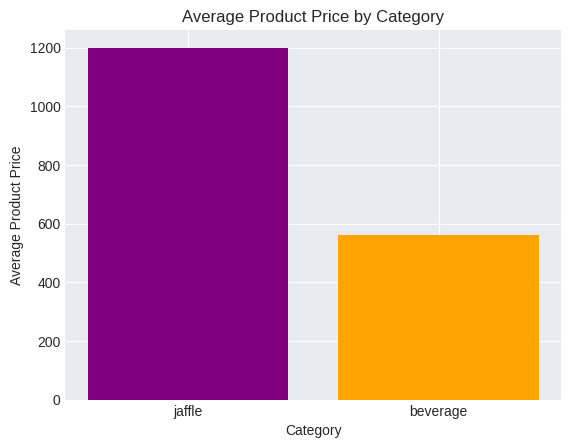

In [56]:
# Supporting analysis for Recommendation 2
# Your code here

# Gross margin per product
product_margins = (
    products.join(supplies.group_by("sku").agg(pl.sum("cost").alias("total_supply_cost")), on="sku")
    .with_columns((pl.col("price") - pl.col("total_supply_cost")).alias("gross_margin"))
)

highest_margin_products = product_margins.sort("gross_margin", descending=True).limit(5)
print(highest_margin_products)

# Avg price by category
avg_price_by_type = (
    products
    .group_by('type')
    .agg(pl.col("price").mean().alias("average_product_price"))
)

# Plot
categories = avg_price_by_type['type'].to_list()
average_prices = avg_price_by_type['average_product_price'].to_list()

plt.bar(categories, average_prices, color=['purple', 'orange'])
plt.xlabel('Category')
plt.ylabel('Average Product Price')
plt.title('Average Product Price by Category')
plt.show()

### Recommendation 3: Create loyalty incentives for repeat customers


*   922 out of 932 customers which is ~99% of the customer base, are repeat buyers.
*   The Top 10 customers alone contributed $2.5 million+ in revenue.

Proposed action items:


*   Launch a loyalty/rewards program to further encourage repeat purchases and increase average order value.
*   Personalize promotions for high-value customers.

Repeat customers: 920
shape: (10, 3)
┌─────────────────────────────────┬───────────────┬──────────────────────┐
│ customer                        ┆ total_revenue ┆ name                 │
│ ---                             ┆ ---           ┆ ---                  │
│ str                             ┆ i64           ┆ str                  │
╞═════════════════════════════════╪═══════════════╪══════════════════════╡
│ ea3ada4c-8ffa-4e73-a51f-27711f… ┆ 262647        ┆ David Leonard        │
│ 4fb3b92c-29cc-410f-a898-9784c4… ┆ 259037        ┆ Jesse Moore          │
│ 99facd33-7b11-4955-aa0d-ccd118… ┆ 258515        ┆ Diane Davis          │
│ 8bbf796d-0862-41c6-b533-38d6c2… ┆ 252703        ┆ Holly Johnson        │
│ bc94ad77-6703-48d9-85d9-7908e7… ┆ 249821        ┆ Gregory Hayes        │
│ 3ddc958e-73f5-4fe9-804e-d63c8b… ┆ 247510        ┆ Julie Robinson       │
│ 0b92fd92-9200-47fe-9b57-9ada88… ┆ 246325        ┆ Christopher Robinson │
│ a54f0762-0ac2-4821-bb45-835fd4… ┆ 244102        ┆ Douglas Bur

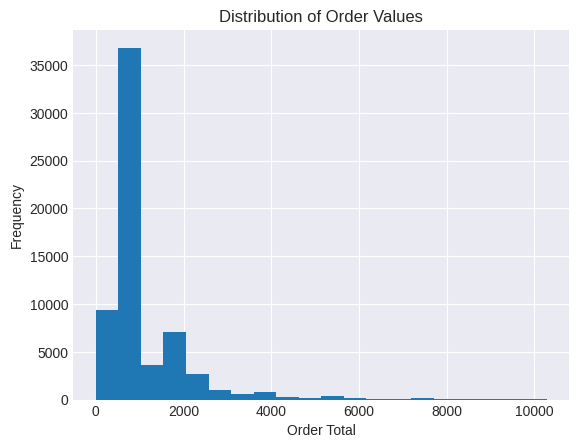

In [57]:
# Supporting analysis for Recommendation 3
# Your code here

# Repeat customers
repeat_customer_analysis = (
    orders.group_by("customer")
    .agg(pl.len().alias("num_orders"))
    .with_columns((pl.col("num_orders") > 1).alias("is_repeat_customer"))
)
num_repeat_customers = repeat_customer_analysis.filter(pl.col("is_repeat_customer")).shape[0]
print(f"Repeat customers: {num_repeat_customers}")

# Top 10 customers by revenue
top_revenue_customers = (
    orders.group_by("customer")
    .agg(pl.sum("order_total").alias("total_revenue"))
    .join(customers, left_on="customer", right_on="id")
    .sort("total_revenue", descending=True)
    .limit(10)
)
print(top_revenue_customers)

# Order value distribution
order_value_distribution = orders.select(pl.col("order_total"))
plt.hist(order_value_distribution["order_total"].to_list(), bins=20)
plt.xlabel("Order Total")
plt.ylabel("Frequency")
plt.title("Distribution of Order Values")
plt.show()

## Executive Summary
This analysis offers a data-backed view of Jaffle Shop’s performance across store locations, product categories, and customer behavior. Drawing on over 63,000 orders and 90,000 item-level transactions, the findings highlight key revenue trends, profitability drivers, and loyalty patterns. The goal is to surface actionable insights that can inform decisions around expansion, product strategy, and customer growth.

### Key Findings:
1. Brooklyn leads in daily revenue performance across all locations (~ USD 132,690/day), despite being a newer store. Its lower tax rate (4 percent) may be contributing to higher efficiency.
2. Jaffles yield significantly higher profit margins than beverages, even though beverages lead in total revenue. Products like Flame Impala generate margins over 70 percent.
3. Customer loyalty is especially strong, with 99 percent of customers being repeat buyers. The top 10 customers alone account for over $2.5 million in revenue.

### Strategic Recommendations:
1. Use Brooklyn as a benchmark for future store expansion, focusing on low-tax, high-demand areas. Study potential contributing factors that may have contributed in Brooklyn's success like customer demographics, location analysis, marketing tactics, etc.
2. Bundle low-margin items with high-margin anchors to blend the margins. Instead of promoting low-margin beverages as standalone items, bundle them with top-performing jaffles to lift average margin per order. For example, a combination of Nutellaphone who dis? and Vanilla Ice could be offered at a slight discount to increase attachment rate and blended profitability.
3. Launch a Test-and-Learn Store Format in underserved markets. Leverage learnings from Brooklyn and Philadelphia to pilot a smaller-format or pop-up Jaffle Shop in a new region with a favorable tax and customer profile. Track performance over 90 days and use insights to scale or adapt the format. This mitigates risk while exploring growth.